# 2. Zanders Proposal Presentation (Italy Data Only)

This code cotains the computations for the first presentation at Zanders: Micro only; Macro only and Micro&Macro on Italy dataset. Each model is run with and without interactions.

In [1]:
import pandas as pd
import numpy  as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
from utils import load_micro_data, merge_macro_micro_it, calculate_woe, get_train_test, run_model

# Obtaining the datasets

In [4]:
micro = load_micro_data()
df = merge_macro_micro_it(micro)

In [5]:
micro

,index,bvd_id_number,country_code,industry_code,size_class,status_year,status_date_latest,status_latest,default_indicator,fixed_assets_0,...,total_shareh_funds_liab_0,working_capital_0,operating_revenue_0,operating_pl_ebit_0,financial_expenses_0,financial_pl_0,pl_before_tax_0,taxation_0,pl_after_tax_0,pl_for_period_net_income_0
0,7000375,IT00174710145,IT,C,SME,2006,16991231,non_default,0,1384038.0,...,3128339.0,-1290288.0,7153464.0,157932.0,10463.0,1948.0,159880.0,99269.0,60611.0,60611.0
1,7000376,IT00174710145,IT,C,SME,2005,16991231,non_default,0,1067546.0,...,2078526.0,-453473.0,6622374.0,213750.0,8737.0,-380.0,213370.0,103094.0,110276.0,110276.0
2,7000905,IT02969620133,IT,G,SME,2019,16991231,non_default,0,925814.0,...,5918714.0,3757057.0,8982328.0,818680.0,14099.0,-8099.0,810581.0,247588.0,562993.0,562993.0
3,7000907,IT02969620133,IT,G,SME,2017,16991231,non_default,0,878699.0,...,4304819.0,2473106.0,6502724.0,143068.0,3806.0,28116.0,171184.0,62097.0,109087.0,109087.0
4,7003402,IT05253550965,IT,J,SME,2014,16991231,non_default,0,1093289.0,...,7564534.0,0.0,8103962.0,1696660.0,9672.0,-6765.0,1689895.0,637300.0,1052595.0,1061759.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305519,430272630,IT00726060155,IT,C,SME,2011,16991231,non_default,1,4697330.0,...,11114746.0,3588397.0,5717913.0,142477.0,198337.0,-169554.0,-27077.0,65966.0,-93043.0,6210.0
305520,86196217,IT01588300465,IT,G,SME,2017,16991231,non_default,0,257513.0,...,6572480.0,4403884.0,5978998.0,-126172.0,100350.0,-95926.0,-222098.0,2775.0,-224873.0,-224873.0
305521,233482640,IT01998880486,IT,G,SME,2013,16991231,non_default,0,375161.0,...,2839242.0,1058990.0,8685090.0,-81389.0,6822.0,-6019.0,-87408.0,-9044.0,-78364.0,-73872.0
305522,430282806,IT00735460347,IT,G,SME,2010,16991231,non_default,0,2527102.0,...,2803597.0,-50886.0,7644379.0,-872244.0,136598.0,-90128.0,-962372.0,0.0,-962372.0,221392.0


In [6]:
# Note: Macro data for italy onnly till 2020 in this case, hence the lower number of observations

df

,index,bvd_id_number,country_code,industry_code,size_class,status_year,status_date_latest,status_latest,default_indicator,fixed_assets_0,...,EURxCAD,EURxMXD,EURxBRL,EURxSAR,EURxAED,EURxZAR,EURxCNY,EURxJPY,EURxKRW,EURxAUD
0,7000375,IT00174710145,IT,C,SME,2006,16991231,non_default,0,1384038.0,...,1.424638,13.704182,2.733507,4.711947,4.615396,8.520908,10.014335,146.176808,1199.034767,1.667305
1,7020575,IT00965950496,IT,C,SME,2006,16991231,non_default,0,3016435.0,...,1.424638,13.704182,2.733507,4.711947,4.615396,8.520908,10.014335,146.176808,1199.034767,1.667305
2,7047993,IT01338530353,IT,N,SME,2006,16991231,non_default,0,390019.0,...,1.424638,13.704182,2.733507,4.711947,4.615396,8.520908,10.014335,146.176808,1199.034767,1.667305
3,7025523,IT05711140581,IT,I,SME,2006,16991231,non_default,0,170327008.0,...,1.424638,13.704182,2.733507,4.711947,4.615396,8.520908,10.014335,146.176808,1199.034767,1.667305
4,7035105,IT00126400407,IT,H,SME,2006,16991231,non_default,0,7407750.0,...,1.424638,13.704182,2.733507,4.711947,4.615396,8.520908,10.014335,146.176808,1199.034767,1.667305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258996,360436220,IT01115500371,IT,C,SME,2001,16991231,non_default,0,5912674.0,...,1.386985,8.365969,2.10476,3.357692,3.29132,7.712778,7.413201,108.836322,1154.86264,1.73158
258997,360430514,IT00948190582,IT,N,SME,2001,16991231,non_default,0,1589916.0,...,1.386985,8.365969,2.10476,3.357692,3.29132,7.712778,7.413201,108.836322,1154.86264,1.73158
258998,360440242,IT00955960430,IT,C,SME,2001,16991231,non_default,0,450471.0,...,1.386985,8.365969,2.10476,3.357692,3.29132,7.712778,7.413201,108.836322,1154.86264,1.73158
258999,375365529,IT06589831004,IT,F,SME,2001,16991231,non_default,0,67908.0,...,1.386985,8.365969,2.10476,3.357692,3.29132,7.712778,7.413201,108.836322,1154.86264,1.73158


# GET TRAIN TEST DATA

In [7]:
woE_sector = calculate_woe(micro, 'industry_code', 'default_indicator')


### Create micro/macro only datasets

In [8]:
y = df['default_indicator']

df_woe = df.merge(woE_sector, on = 'industry_code')
micro = pd.concat([df.iloc[:,9:39], df_woe['WoE_industry']], axis = 1)
macro = df.iloc[:,39:]

In [9]:
micro

,fixed_assets_0,intangible_fixed_assets_0,tangible_fixed_assets_0,other_fixed_assets_0,current_assets_0,stock_0,debtors_0,other_current_assets_0,cash_cash_equivalent_0,total_assets_0,...,working_capital_0,operating_revenue_0,operating_pl_ebit_0,financial_expenses_0,financial_pl_0,pl_before_tax_0,taxation_0,pl_after_tax_0,pl_for_period_net_income_0,WoE_industry
0,1384038.0,819427.0,559611.0,5000.0,1744301.0,269078.0,398247.0,1076976.0,924514.0,3128339.0,...,-1290288.0,7153464.0,157932.0,10463.0,1948.0,159880.0,99269.0,60611.0,60611.0,-0.190864
1,3016435.0,98714.0,2814471.0,103250.0,5141557.0,2104577.0,2498803.0,538177.0,90013.0,8157992.0,...,3348700.0,5241616.0,461355.0,170445.0,-158914.0,302441.0,225492.0,76949.0,75445.0,-0.190864
2,390019.0,3648.0,254921.0,131450.0,8107921.0,619529.0,6627795.0,860597.0,159140.0,8497940.0,...,3575737.0,8882405.0,634902.0,66448.0,-66367.0,568535.0,274065.0,294470.0,294470.0,-0.190864
3,170327008.0,1788000.0,161552992.0,6986000.0,27079000.0,6864000.0,1528000.0,18687000.0,9419000.0,197406000.0,...,4443000.0,9354000.0,-1140000.0,1411000.0,-1112000.0,-2252000.0,586000.0,-2838000.0,-2662000.0,-0.190864
4,7407750.0,3971765.0,2418803.0,1017182.0,4999136.0,65404.0,3069240.0,1864492.0,411733.0,12406886.0,...,2032376.0,6976837.0,-196216.0,110436.0,-98701.0,-294917.0,130288.0,-425205.0,9214.0,-0.190864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258996,5912674.0,84742.0,5800416.0,27516.0,5024565.0,2850957.0,1739672.0,433936.0,258896.0,10937239.0,...,1795581.0,7920631.0,-4722806.0,1155628.0,-1154252.0,-5877058.0,0.0,-5877058.0,-6041405.0,-0.175561
258997,1589916.0,1444071.0,108918.0,36927.0,4999969.0,0.0,1715557.0,3284413.0,703442.0,6589886.0,...,-3764257.0,8079931.0,-565202.0,37334.0,-36309.0,-601511.0,25522.0,-627034.0,48977.0,-0.175561
258998,450471.0,217.0,118085.0,332169.0,2685329.0,1129985.0,0.0,1555344.0,40434.0,3135800.0,...,1129985.0,5998903.0,270723.0,254573.0,-244712.0,26011.0,41874.0,-15863.0,3613.0,-0.175561
258999,67908.0,2541.0,65367.0,0.0,194541.0,92962.0,0.0,101579.0,17644.0,262450.0,...,92962.0,6217704.0,150189.0,750.0,-750.0,149439.0,42844.0,106595.0,106595.0,-0.175561


In [10]:
macro

,gdp_growth,inflation_growth,interest_rate,unemployment,hh_debt0,hh_debt1,nc_debt0,nc_debt1,gg_debt0,gg_debt1,...,EURxCAD,EURxMXD,EURxBRL,EURxSAR,EURxAED,EURxZAR,EURxCNY,EURxJPY,EURxKRW,EURxAUD
0,1.790640,2.090844,5.621779,6.777,48.195001,35.696160,114.279623,69.556988,100.768188,106.739678,...,1.424638,13.704182,2.733507,4.711947,4.615396,8.520908,10.014335,146.176808,1199.034767,1.667305
1,1.790640,2.090844,5.621779,6.777,48.195001,35.696160,114.279623,69.556988,100.768188,106.739678,...,1.424638,13.704182,2.733507,4.711947,4.615396,8.520908,10.014335,146.176808,1199.034767,1.667305
2,1.790640,2.090844,5.621779,6.777,48.195001,35.696160,114.279623,69.556988,100.768188,106.739678,...,1.424638,13.704182,2.733507,4.711947,4.615396,8.520908,10.014335,146.176808,1199.034767,1.667305
3,1.790640,2.090844,5.621779,6.777,48.195001,35.696160,114.279623,69.556988,100.768188,106.739678,...,1.424638,13.704182,2.733507,4.711947,4.615396,8.520908,10.014335,146.176808,1199.034767,1.667305
4,1.790640,2.090844,5.621779,6.777,48.195001,35.696160,114.279623,69.556988,100.768188,106.739678,...,1.424638,13.704182,2.733507,4.711947,4.615396,8.520908,10.014335,146.176808,1199.034767,1.667305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258996,1.951372,2.785165,7.287750,9.599,35.627699,23.948711,98.011635,58.833466,105.601220,108.886307,...,1.386985,8.365969,2.10476,3.357692,3.29132,7.712778,7.413201,108.836322,1154.86264,1.73158
258997,1.951372,2.785165,7.287750,9.599,35.627699,23.948711,98.011635,58.833466,105.601220,108.886307,...,1.386985,8.365969,2.10476,3.357692,3.29132,7.712778,7.413201,108.836322,1154.86264,1.73158
258998,1.951372,2.785165,7.287750,9.599,35.627699,23.948711,98.011635,58.833466,105.601220,108.886307,...,1.386985,8.365969,2.10476,3.357692,3.29132,7.712778,7.413201,108.836322,1154.86264,1.73158
258999,1.951372,2.785165,7.287750,9.599,35.627699,23.948711,98.011635,58.833466,105.601220,108.886307,...,1.386985,8.365969,2.10476,3.357692,3.29132,7.712778,7.413201,108.836322,1154.86264,1.73158


# RESULTS

### MICRO ONLY

In [11]:
data = get_train_test(micro, y, use_SMOTE = True)

* with interactions

In [12]:
# With Interactions
xg = run_model(data, type = 'xgboost', interactions=True, feat_imp = True, version = 1)

rf = run_model(data, type = 'RF', interactions = True, feat_imp = True, version = 1)

log = run_model(data, interactions = True, type = 'logit', version = 1)

Results for xgboost
------------------------------
Confussion Matrx:
 [[49684  1461]
 [  280   376]]

AUC: 0.7723

Feature Importance:

The most important features for xgboost are:
capital_0 * long_term_debt_0 : 0.057
capital_0 * noncurrent_liabilities_0 : 0.055
capital_0 * other_shareholders_funds_0 : 0.054
capital_0 * tangible_fixed_assets_0 : 0.048
shareholders_funds_0 * operating_revenue_0 : 0.047
Results for RF
------------------------------
Confussion Matrx:
 [[49713  1432]
 [  283   373]]

AUC: 0.7703

Feature Importance:

The most important features for RF are:
capital_0 * other_shareholders_funds_0 : 0.097
capital_0 * tangible_fixed_assets_0 : 0.095
shareholders_funds_0 * financial_expenses_0 : 0.085
shareholders_funds_0 * operating_revenue_0 : 0.067
shareholders_funds_0 * other_current_liabilities_0 : 0.049
Results for logit
------------------------------
Confussion Matrx:
 [[50752   393]
 [  461   195]]

AUC: 0.6448


* without interactions

In [14]:
# Without Interactions
xg = run_model(data, type = 'xgboost', interactions=False,feat_imp=True, version = 1)
print('\n')
rf = run_model(data, type = 'RF', interactions=False, feat_imp = True,  version = 1)
print('\n')
log = run_model(data, interactions = False, type = 'logit', version = 1)

Results for xgboost
------------------------------
Confussion Matrx:
 [[49933  1212]
 [  303   353]]

AUC: 0.7572

Feature Importance:

The most important features for xgboost are:
other_shareholders_funds_0 : 0.235
shareholders_funds_0 : 0.175
pl_for_period_net_income_0 : 0.133
pl_after_tax_0 : 0.128
operating_pl_ebit_0 : 0.124


Results for RF
------------------------------
Confussion Matrx:
 [[49948  1197]
 [  301   355]]

AUC: 0.7589

Feature Importance:

The most important features for RF are:
shareholders_funds_0 : 0.196
pl_for_period_net_income_0 : 0.167
other_shareholders_funds_0 : 0.167
operating_pl_ebit_0 : 0.121
pl_before_tax_0 : 0.108


Results for logit
------------------------------
Confussion Matrx:
 [[50930   215]
 [  525   131]]

AUC: 0.5977


### MACRO ONLY

In [15]:
data = get_train_test(macro, y)

In [16]:
# With Interaction
xg = run_model(data, type = 'xgboost', interactions = True, feat_imp = True, version = 1)

rf = run_model(data, type = 'RF', interactions = True, feat_imp = True, version = 1)

logit = run_model(data, type = 'logit', version = 1)



Results for xgboost
------------------------------
Confussion Matrx:
 [[49727  1418]
 [  572    84]]

AUC: 0.5502

Feature Importance:

The most important features for xgboost are:
EURxDKK * EURxRUB : 0.079
EURxDKK * EURxNOK : 0.063
EURxDKK * EURxBGN : 0.048
EURxDKK * EURxHUF : 0.032
EURxDKK * EURxPLN : 0.032
Results for RF
------------------------------
Confussion Matrx:
 [[49727  1418]
 [  572    84]]

AUC: 0.5502

Feature Importance:

The most important features for RF are:
EURxCZK * EURxKRW : 0.062
EURxCZK * EURxJPY : 0.047
EURxCZK * EURxCNY : 0.047
EURxCZK * EURxZAR : 0.034
EURxCZK * EURxSAR : 0.032
Results for logit
------------------------------
Confussion Matrx:
 [[49727  1418]
 [  572    84]]

AUC: 0.5502


In [17]:
# Without Interactions
xg = run_model(data, type = 'xgboost', interactions=False, feat_imp = True, version = 1)

rf = run_model(data, type = 'RF', interactions=False, feat_imp = True, version = 1)

logit = run_model(data, type = 'logit', interactions=False, version = 1)

Results for xgboost
------------------------------
Confussion Matrx:
 [[49727  1418]
 [  572    84]]

AUC: 0.5502

Feature Importance:

The most important features for xgboost are:
EURxNOK : 0.176
yield_10y : 0.114
EURxAUD : 0.108
nc_debt0 : 0.102
EURxSEK : 0.096
Results for RF
------------------------------
Confussion Matrx:
 [[49727  1418]
 [  572    84]]

AUC: 0.5502

Feature Importance:

The most important features for RF are:
EURxAUD : 0.135
yield_10y : 0.103
EURxBRL : 0.083
nc_debt0 : 0.081
EURxJPY : 0.08
Results for logit
------------------------------
Confussion Matrx:
 [[49727  1418]
 [  572    84]]

AUC: 0.5502


### MICRO + MACRO

In [18]:
data = get_train_test(pd.concat([micro, macro], axis = 1), y)

In [19]:
# With Interactions
xg = run_model(data, type = 'xgboost', interactions = True, feat_imp = True, version = 1)

rf = run_model(data, type = 'RF', interactions = True, feat_imp = True, version = 1)

logit = run_model(data, type = 'logit', version = 1)

Results for xgboost
------------------------------
Confussion Matrx:
 [[50227   918]
 [  318   338]]

AUC: 0.7486

Feature Importance:

The most important features for xgboost are:
financial_pl_0 * EURxTRY : 0.036
financial_pl_0 * EURxRUB : 0.035
financial_pl_0 * EUGxGBP : 0.033
financial_pl_0 * EURxBGN : 0.033
financial_pl_0 * EURxHUF : 0.033
Results for RF
------------------------------
Confussion Matrx:
 [[50100  1045]
 [  306   350]]

AUC: 0.7566

Feature Importance:

The most important features for RF are:
financial_pl_0 * EURxMXD : 0.046
financial_pl_0 * EURxCAD : 0.046
financial_pl_0 * EURxUSD : 0.041
financial_pl_0 * EURxTRY : 0.04
financial_pl_0 * EURxRUB : 0.038
Results for logit
------------------------------
Confussion Matrx:
 [[49513  1632]
 [  487   169]]

AUC: 0.6129


In [20]:
# Without Interactions
xg = run_model(data, type = 'xgboost', interactions=False, feat_imp = True, version = 1)

rf = run_model(data, type = 'RF', interactions=False, feat_imp = True, version = 1)

logit = run_model(data, type = 'logit', interactions=False, version = 1)

Results for xgboost
------------------------------
Confussion Matrx:
 [[50174   971]
 [  322   334]]

AUC: 0.7451

Feature Importance:

The most important features for xgboost are:
shareholders_funds_0 : 0.15
operating_pl_ebit_0 : 0.143
other_shareholders_funds_0 : 0.121
pl_after_tax_0 : 0.105
pl_for_period_net_income_0 : 0.082
Results for RF
------------------------------
Confussion Matrx:
 [[50068  1077]
 [  314   342]]

AUC: 0.7501

Feature Importance:

The most important features for RF are:
other_shareholders_funds_0 : 0.158
shareholders_funds_0 : 0.144
operating_pl_ebit_0 : 0.124
pl_after_tax_0 : 0.104
pl_for_period_net_income_0 : 0.096
Results for logit
------------------------------
Confussion Matrx:
 [[49513  1632]
 [  487   169]]

AUC: 0.6129


### RATIOS

In [21]:
# We compute the ratios first and get them in one dataframe

#Liquidity ratio's
gen_liq= df['current_assets_0']/df['current_liabilities_0']
liquidity_ratio= (df['current_assets_0']-df['stock_0'])/df['current_liabilities_0']
immediate_liquidity= df['cash_cash_equivalent_0']/df['current_liabilities_0']

#Solvency ratio's
solvency_ratio = df['current_liabilities_0']/df['total_assets_0']

# NEW?
debt_ratio = (df['current_liabilities_0'] + df['noncurrent_liabilities_0'] + df['other_current_liabilities_0'] + df['other_noncurrent_liabilities_0'])/ df['total_assets_0']
debt_to_eq = (df['current_liabilities_0'] + df['noncurrent_liabilities_0'] + df['other_current_liabilities_0'] + df['other_noncurrent_liabilities_0'])/ (df['shareholders_funds_0'] + df['other_shareholders_funds_0']) #(equal to shareholder equity)?

#Profitability
economic_profit= df['pl_for_period_net_income_0']/df['total_assets_0']
financial_profit= df['pl_for_period_net_income_0']/df['shareholders_funds_0']
ROA = df['operating_pl_ebit_0']/df['total_assets_0']

# NEW? 
ROE = df['operating_pl_ebit_0'] / (df['shareholders_funds_0'] + df['other_shareholders_funds_0']) #(equal to shareholder equity)?


#Activity
stock_rotation= df['operating_revenue_0']/df['stock_0']
rev_over_assets = df['operating_revenue_0']/df['total_assets_0']

liabilities = df['total_shareh_funds_liab_0'] - df['shareholders_funds_0']

#Indebtedness
ind1= df['long_term_debt_0']/df['total_assets_0']
ind2= df['shareholders_funds_0']/liabilities
ind3= df['long_term_debt_0']/df['shareholders_funds_0']
ind4= df['long_term_debt_0']/df['current_liabilities_0']
ind5= liabilities/df['total_assets_0']
#ind6= df['operating_pl_ebit_0']/df['financial_expenses_0']
ind7= df['fixed_assets_0']/df['shareholders_funds_0']
ind8= (df['shareholders_funds_0']+ df['long_term_debt_0'])/df['total_assets_0']
ind9= (df['shareholders_funds_0']+ df['long_term_debt_0'])/df['current_liabilities_0']
ind10= (df['shareholders_funds_0']+ df['long_term_debt_0'])/liabilities

#Equilibrium
Eq1 = df['working_capital_0']/df['total_assets_0']

ratios= np.column_stack((df['index'],gen_liq, liquidity_ratio,immediate_liquidity, solvency_ratio, economic_profit,
                    financial_profit, ROA, stock_rotation, rev_over_assets, 
                     ind1, ind2, ind3, ind4, ind5, ind7, ind8, 
                     ind9, ind10,Eq1))

ratios= pd.DataFrame(ratios, columns = ['index','gen_liq', 'liq_ratio', 'imm_liq', 'solvency', 'economic_profit', 'financial_profit',
                                   'ROA','stock_rotation','rev_over_assets','ind1','ind2','ind3','ind4','ind5','ind7','ind8','ind9','ind10','Eq1'])


# current_assets_0/current_liabilities_0
# cash_cash_equivalent_0/current_liabilities_0
# (current_assets_0-stock_0)/current_liabilities_0
# shareholders_funds_0/noncurrent_liabilities_0
# shareholders_funds_0/ (shareholders_funds_0 +noncurrent_liabilities_0)
# current_liabilities_0/total_assets_0
# pl_for_period_net_income_0/total_assets_0
# (pl_for_period_net_income_0/shareholders_funds_0)*100
# operating_pl_ebit_0/(shareholders_funds_0+noncurrent_liabilities_0) * 100
# operating_pl_ebit_0/total_assets * 100
# operating_pl_ebit_/operating_revenue_0
# operating_pl_ebit/financial_expenses_0 ??
# operating_revenue_0/total_assets?
# long_term_debt_0/total_assets_0

# Merge it with company information
full_data = pd.merge(df,ratios,on= 'index')
full_data = full_data.replace([np.nan, -np.inf, np.inf], 0) # replace problematic values with zeroes

In [22]:
full_data

,index,bvd_id_number,country_code,industry_code,size_class,status_year,status_date_latest,status_latest,default_indicator,fixed_assets_0,...,ind1,ind2,ind3,ind4,ind5,ind7,ind8,ind9,ind10,Eq1
0,7000375,IT00174710145,IT,C,SME,2006,16991231,non_default,0,1384038.0,...,0.000000,0.399140,0.000000,0.000000,0.714725,1.550852,0.285275,0.428024,0.399140,-0.412451
1,7020575,IT00965950496,IT,C,SME,2006,16991231,non_default,0,3016435.0,...,0.240024,0.354825,0.916482,0.531199,0.738103,1.411822,0.501921,1.110806,0.680015,0.410481
2,7047993,IT01338530353,IT,N,SME,2006,16991231,non_default,0,390019.0,...,0.042515,0.146421,0.332876,0.051703,0.872280,0.359347,0.170235,0.207025,0.195161,0.420777
3,7025523,IT05711140581,IT,I,SME,2006,16991231,non_default,0,170327008.0,...,0.090018,1.988329,0.135290,0.749473,0.334635,1.296771,0.755382,6.289203,2.257330,0.022507
4,7035105,IT00126400407,IT,H,SME,2006,16991231,non_default,0,7407750.0,...,0.012216,1.872339,0.018741,0.042940,0.348148,0.915956,0.664068,2.334141,1.907429,0.163810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258996,360436220,IT01115500371,IT,C,SME,2001,16991231,non_default,0,5912674.0,...,0.804869,-0.347386,-1.512059,1.167239,1.532300,-1.015594,0.272569,0.395286,0.177882,0.164171
258997,360430514,IT00948190582,IT,N,SME,2001,16991231,non_default,0,1589916.0,...,0.000000,0.018984,0.000000,0.000000,0.981370,12.950362,0.018630,0.020406,0.018984,-0.571217
258998,360440242,IT00955960430,IT,C,SME,2001,16991231,non_default,0,450471.0,...,0.000000,0.055194,0.000000,0.000000,0.947693,2.746389,0.052307,0.087475,0.055194,0.360350
258999,375365529,IT06589831004,IT,F,SME,2001,16991231,non_default,0,67908.0,...,0.000000,0.799390,0.000000,0.000000,0.555744,0.582426,0.444256,0.799395,0.799390,0.354208


In [23]:
Y = full_data['default_indicator']
X = full_data.iloc[:,40:]

In [24]:
X = pd.concat([X, micro['WoE_industry']], axis = 1)

In [25]:
X

,inflation_growth,interest_rate,unemployment,hh_debt0,hh_debt1,nc_debt0,nc_debt1,gg_debt0,gg_debt1,yield_1d,...,ind2,ind3,ind4,ind5,ind7,ind8,ind9,ind10,Eq1,WoE_industry
0,2.090844,5.621779,6.777,48.195001,35.696160,114.279623,69.556988,100.768188,106.739678,2.835733,...,0.399140,0.000000,0.000000,0.714725,1.550852,0.285275,0.428024,0.399140,-0.412451,-0.190864
1,2.090844,5.621779,6.777,48.195001,35.696160,114.279623,69.556988,100.768188,106.739678,2.835733,...,0.354825,0.916482,0.531199,0.738103,1.411822,0.501921,1.110806,0.680015,0.410481,-0.190864
2,2.090844,5.621779,6.777,48.195001,35.696160,114.279623,69.556988,100.768188,106.739678,2.835733,...,0.146421,0.332876,0.051703,0.872280,0.359347,0.170235,0.207025,0.195161,0.420777,-0.190864
3,2.090844,5.621779,6.777,48.195001,35.696160,114.279623,69.556988,100.768188,106.739678,2.835733,...,1.988329,0.135290,0.749473,0.334635,1.296771,0.755382,6.289203,2.257330,0.022507,-0.190864
4,2.090844,5.621779,6.777,48.195001,35.696160,114.279623,69.556988,100.768188,106.739678,2.835733,...,1.872339,0.018741,0.042940,0.348148,0.915956,0.664068,2.334141,1.907429,0.163810,-0.190864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258996,2.785165,7.287750,9.599,35.627699,23.948711,98.011635,58.833466,105.601220,108.886307,4.382325,...,-0.347386,-1.512059,1.167239,1.532300,-1.015594,0.272569,0.395286,0.177882,0.164171,-0.175561
258997,2.785165,7.287750,9.599,35.627699,23.948711,98.011635,58.833466,105.601220,108.886307,4.382325,...,0.018984,0.000000,0.000000,0.981370,12.950362,0.018630,0.020406,0.018984,-0.571217,-0.175561
258998,2.785165,7.287750,9.599,35.627699,23.948711,98.011635,58.833466,105.601220,108.886307,4.382325,...,0.055194,0.000000,0.000000,0.947693,2.746389,0.052307,0.087475,0.055194,0.360350,-0.175561
258999,2.785165,7.287750,9.599,35.627699,23.948711,98.011635,58.833466,105.601220,108.886307,4.382325,...,0.799390,0.000000,0.000000,0.555744,0.582426,0.444256,0.799395,0.799390,0.354208,-0.175561


In [26]:
data = get_train_test(X, Y)

In [27]:
# With Interaction
xg = run_model(data, type = 'xgboost', interactions = True, feat_imp = True, version = 1)

rf = run_model(data, type = 'RF', interactions = True, feat_imp = True, version = 1)

rf = run_model(data, type = 'logit', version = 1)

Results for xgboost
------------------------------
Confussion Matrx:
 [[50102  1043]
 [  299   357]]

AUC: 0.7619

Feature Importance:

The most important features for xgboost are:
EURxRUB * unemployment : 0.052
EURxNOK * WoE_industry : 0.051
EURxNOK * Eq1 : 0.047
EURxNOK * ind10 : 0.045
EURxNOK * ind9 : 0.039
Results for RF
------------------------------
Confussion Matrx:
 [[50137  1008]
 [  302   354]]

AUC: 0.76

Feature Importance:

The most important features for RF are:
EURxRUB * unemployment : 0.087
EURxNOK * WoE_industry : 0.063
EURxNOK * Eq1 : 0.056
EURxNOK * ind10 : 0.051
EURxNOK * ind9 : 0.044
Results for logit
------------------------------
Confussion Matrx:
 [[50074  1071]
 [  371   285]]

AUC: 0.7068


In [28]:
# Without Interactions
xg = run_model(data, type = 'xgboost', interactions=False, feat_imp = True, version = 1)

rf = run_model(data, type = 'RF', interactions=False, feat_imp = True, version = 1)

rf = run_model(data, type = 'logit', version = 1)

Results for xgboost
------------------------------
Confussion Matrx:
 [[50233   912]
 [  319   337]]

AUC: 0.7479

Feature Importance:

The most important features for xgboost are:
economic_profit : 0.206
ind5 : 0.161
ind8 : 0.154
solvency : 0.137
ROA : 0.128
Results for RF
------------------------------
Confussion Matrx:
 [[50148   997]
 [  299   357]]

AUC: 0.7624

Feature Importance:

The most important features for RF are:
economic_profit : 0.254
ROA : 0.203
ind5 : 0.124
ind8 : 0.109
solvency : 0.091
Results for logit
------------------------------
Confussion Matrx:
 [[50074  1071]
 [  371   285]]

AUC: 0.7068


### Plot for presentation

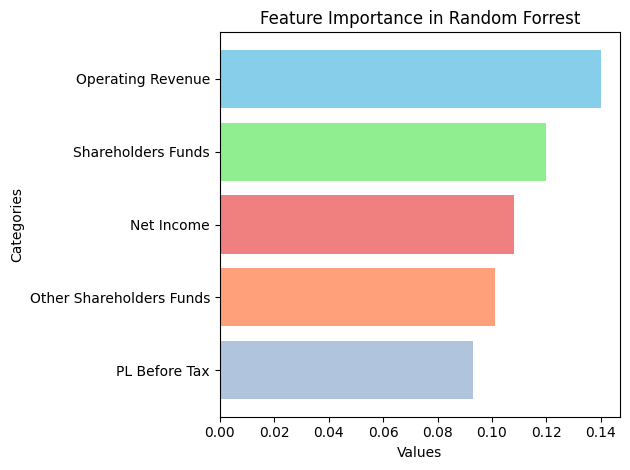

In [29]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import style
style.use('default')

# Data
categories = ('Operating Revenue', 'Shareholders Funds', 'Net Income', 'Other Shareholders Funds', 'PL Before Tax')
values = (0.14, 0.12, 0.108, 0.101, 0.093)
y_pos = np.arange(len(categories))

fig, ax = plt.subplots()

# Custom colors for each bar
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightsteelblue']

ax.barh(y_pos, values, color = colors)

ax.set_yticks(y_pos)
ax.set_yticklabels(categories)
ax.invert_yaxis()

# Adding labels and title
ax.set_xlabel('Values')
ax.set_ylabel('Categories')
ax.set_title('Feature Importance in Random Forrest')

plt.tight_layout()

# Display the plot
plt.savefig('fi_rf.png', dpi=200)
plt.show()